In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [9]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

print(train.shape)
print(test.shape)
print(sub.shape)

(140700, 20)
(93800, 19)
(93800, 2)


In [6]:
train['Depression'].value_counts()/len(train)*100

Depression
0    81.828714
1    18.171286
Name: count, dtype: float64

In [7]:
print(train.columns)
train.head()

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [10]:
train.drop(columns = ['Name','City', 'Academic Pressure','CGPA','Study Satisfaction'] , inplace = True)

In [12]:
data = {
    'dietary_habits': [
        'Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc', 'Gender', '3',
        'More Healthy', 'Less than Healthy', 'Mihir', '1.0', 'Hormonal', 'Electrician', 
        None, 'No Healthy', 'Less Healthy', 'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 
        'Class 12', '2'
    ]
}
df = pd.DataFrame(data)

In [13]:
train['Dietary Habits'] = train['Dietary Habits'].replace({
    'More Healthy': 'Healthy',
    'Less Healthy': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy'
})


mode_value = train['Dietary Habits'].mode()[0]
train['Dietary Habits'] = train['Dietary Habits'].apply(
    lambda x: x if x in ['Healthy', 'Unhealthy', 'Moderate'] else mode_value
)

In [14]:
data = {
    'Degree': [
        'BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
        'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
        'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
        'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
        'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
        'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
        'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
        'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
        'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
        'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
        'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
        'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
        'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
        'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
        'Mahika', None, 'K.Ed', 'B.3.79', 'Mthanya', 'Working Professional',
        'Esha', 'LLS', 'LLEd', 'E.Tech', 'Doctor', 'N.Pharm', 'LCA',
        'B B.Com', 'RCA', 'Mihir', 'Advait'
    ]
}
df = pd.DataFrame(data)

In [15]:
valid_degrees = [
    'BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
    'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
    'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm',
    'MPA', 'BEd', 'B.Sc', 'M.Arch', 'MPharm', 'MTech'
]

In [16]:
mode_value = train['Degree'].mode()[0]  
train['Degree'] = train['Degree'].apply(lambda x: x if x in valid_degrees else mode_value)

In [17]:
data = {
    'Profession': [
        'Chef', 'Teacher', None, 'Business Analyst', 'Finanancial Analyst',
        'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
        'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
        'HR Manager', 'UX/UI Designer', 'Content Writer',
        'Educational Consultant', 'Civil Engineer', 'Manager',
        'Pharmacist', 'Financial Analyst', 'Architect',
        'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
        'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
        'Digital Marketer', 'Lawyer', 'Research Analyst',
        'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
        'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
        'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
        'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
        'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
        'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'
    ]
}
df = pd.DataFrame(data)

In [18]:
valid_professions = [
    'Chef', 'Teacher', 'Business Analyst', 'Financial Analyst', 'Chemist', 'Electrician',
    'Software Engineer', 'Data Scientist', 'Plumber', 'Marketing Manager', 'Accountant', 
    'Entrepreneur', 'HR Manager', 'UX/UI Designer', 'Content Writer', 'Educational Consultant',
    'Civil Engineer', 'Manager', 'Pharmacist', 'Architect', 'Mechanical Engineer', 
    'Customer Support', 'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer', 
    'Travel Consultant', 'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive', 
    'Doctor', 'Unemployed', 'Investment Banker', 'Family Consultant', 'City Manager', 
    'Medical Doctor', 'Working Professional', 'Analyst'
]

In [19]:
mode_value = train['Profession'].mode()[0]
train['Profession'] = train['Profession'].apply(lambda x: x if x in valid_professions else mode_value)

In [20]:
train.isnull().sum()/train.shape[0]*100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Work Pressure                            19.842217
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [21]:

for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].str.strip()

In [22]:
train.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Student,Teacher,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [26]:
print(train.Gender.unique())
print(train.Age.unique())

['Female' 'Male']
[49. 26. 33. 22. 30. 59. 47. 38. 24. 42. 55. 51. 39. 29. 50. 23. 56. 45.
 37. 46. 31. 19. 28. 25. 41. 60. 18. 36. 21. 58. 44. 43. 40. 35. 54. 27.
 52. 48. 57. 53. 34. 20. 32.]


In [30]:
train.drop(columns = ['Working Professional or Student'] , inplace = True)

In [32]:
train.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Teacher,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [43]:
train['Profession'].value_counts()

Profession
Teacher                   62907
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Mechanical Engineer        11

In [42]:
for col in ['Unemployed','Family Consultant','City Manager','Medical Doctor','Working Professional','Analyst']:
    train = train[train['Profession'] != col]

In [81]:
col = train['Sleep Duration'].unique()

In [85]:
col = col.ravel()

In [86]:
col

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [87]:
col2 = []
for i in col:
    if i not in ['Less than 5 hours','7-8 hours','More than 8 hours','5-6 hours']:
        col2.append(i)

In [89]:
for col in col2:
    train = train[train['Sleep Duration'] != col]

In [102]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38778
7-8 hours            36960
More than 8 hours    32723
5-6 hours            32139
Name: count, dtype: int64

In [93]:
train.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Teacher,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [95]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49689
Unhealthy    46201
Healthy      44723
Name: count, dtype: int64

In [97]:
train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'MPA', 'BEd', 'B.Sc', 'M.Arch', 'MPharm',
       'MTech'], dtype=object)

In [96]:
train['Degree'].value_counts()

Degree
Class 12    14830
B.Ed        11688
B.Arch       8740
B.Com        8110
B.Pharm      5854
BCA          5738
M.Ed         5663
MCA          5228
BBA          5028
BSc          5020
MSc          4876
LLM          4644
M.Pharm      4536
M.Tech       4471
B.Tech       4425
LLB          4346
BHM          4305
MBA          3813
BA           3741
ME           3627
MD           3381
MHM          3282
PhD          3101
BE           3100
M.Com        3090
MBBS         3077
MA           2886
M.Arch          5
B.Sc            3
BEd             2
MPA             1
MPharm          1
MTech           1
Name: count, dtype: int64

In [100]:
for col in ['MTech','MPharm','MPA','BEd','B.Sc','M.Arch']:
    train = train[train['Degree'] != col]

In [101]:
train['Degree'].value_counts()

Degree
Class 12    14830
B.Ed        11688
B.Arch       8740
B.Com        8110
B.Pharm      5854
BCA          5738
M.Ed         5663
MCA          5228
BBA          5028
BSc          5020
MSc          4876
LLM          4644
M.Pharm      4536
M.Tech       4471
B.Tech       4425
LLB          4346
BHM          4305
MBA          3813
BA           3741
ME           3627
MD           3381
MHM          3282
PhD          3101
BE           3100
M.Com        3090
MBBS         3077
MA           2886
Name: count, dtype: int64

In [103]:
train.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Teacher,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [108]:
train.shape

(140600, 14)

In [109]:
train.isnull().sum()/len(train)*100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Profession                                0.000000
Work Pressure                            19.842105
Job Satisfaction                         19.836415
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002845
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [ ]:
#######################################################################################################################

In [110]:
def detect_outliers_in_columns(df):

    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any value in the column is below the lower bound or above the upper bound
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns



def count_of_outliers(df, outlier_columns): # Finding the count of outlier
    outlier_counts = {}
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts

In [111]:
outlier_columns = detect_outliers_in_columns(train)
print("Columns with outliers:", outlier_columns)

outlier_counts = count_of_outliers(train, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: ['Depression']
Outlier counts per column: {'Depression': 25553}


In [112]:
train['Financial Stress'] = train['Financial Stress'].fillna(train['Financial Stress'].median())
train.isnull().sum()/train.shape[0]*100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Profession                                0.000000
Work Pressure                            19.842105
Job Satisfaction                         19.836415
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [113]:
train['Job Satisfaction'] = train['Job Satisfaction'].fillna(train['Job Satisfaction'].median())
train.isnull().sum()/train.shape[0]*100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Profession                                0.000000
Work Pressure                            19.842105
Job Satisfaction                          0.000000
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [114]:
train['Work Pressure'] = train['Work Pressure'].fillna(train['Work Pressure'].median())
train.isnull().sum()/train.shape[0]*100

id                                       0.0
Gender                                   0.0
Age                                      0.0
Profession                               0.0
Work Pressure                            0.0
Job Satisfaction                         0.0
Sleep Duration                           0.0
Dietary Habits                           0.0
Degree                                   0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
Depression                               0.0
dtype: float64

In [115]:
df = train

In [116]:
df.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Teacher,3.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , OrdinalEncoder

In [118]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])
df['Profession' ]  = lab.fit_transform(df['Profession'])
df['Have you ever had suicidal thoughts ?' ]  = lab.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness' ]  = lab.fit_transform(df['Family History of Mental Illness'])
df['Degree' ]  = lab.fit_transform(df['Degree'])

In [119]:
df.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0,49.0,3,5.0,2.0,More than 8 hours,Healthy,9,0,1.0,2.0,0,0
1,1,1,26.0,31,4.0,3.0,Less than 5 hours,Unhealthy,12,1,7.0,3.0,0,1
2,2,1,33.0,31,3.0,3.0,5-6 hours,Healthy,3,1,3.0,1.0,0,1
3,3,1,22.0,31,5.0,1.0,Less than 5 hours,Moderate,6,1,10.0,1.0,1,1
4,4,0,30.0,2,1.0,1.0,5-6 hours,Unhealthy,6,1,9.0,4.0,1,0


In [120]:
# df.drop(columns = ['Dietary Habits'] , inplace = True)
# df.drop(columns = ['Sleep Duration'] , inplace = True)


df['Dietary Habits' ]  = lab.fit_transform(df['Dietary Habits'])
df['Sleep Duration' ]  = lab.fit_transform(df['Sleep Duration'])


In [121]:
df.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0,49.0,3,5.0,2.0,3,0,9,0,1.0,2.0,0,0
1,1,1,26.0,31,4.0,3.0,2,2,12,1,7.0,3.0,0,1
2,2,1,33.0,31,3.0,3.0,0,0,3,1,3.0,1.0,0,1
3,3,1,22.0,31,5.0,1.0,2,1,6,1,10.0,1.0,1,1
4,4,0,30.0,2,1.0,1.0,0,2,6,1,9.0,4.0,1,0


In [ ]:
	Gender	Age	Profession	Work Pressure	Job Satisfaction	Sleep Duration	Dietary Habits	Degree	Have you ever had suicidal thoughts ?	Work/Study Hours	Financial Stress	Family History of Mental Illness

In [189]:
t1 = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
t1.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [122]:
y = df['Depression']
x = df.drop(columns = ['Depression'])

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9,stratify=y)

In [124]:
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)


Depression
0    81.826102
1    18.173898
Name: count, dtype: float64
Depression
0    81.824324
1    18.175676
Name: count, dtype: float64


In [125]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [126]:
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)


Depression
0    50.0
1    50.0
Name: count, dtype: float64
Depression
0    81.824324
1    18.175676
Name: count, dtype: float64


In [127]:
x_train.drop(columns = ['id'] , inplace = True)
x_test.drop(columns = ['id'] , inplace = True)

In [128]:
from sklearn.preprocessing import  StandardScaler

In [129]:
scaler = StandardScaler()
x_train_fit = scaler.fit_transform(x_train)

# Convert the result back to a DataFrame
x_train_scaled = pd.DataFrame(x_train_fit, columns=x_train.columns)

x_test_fit = scaler.fit_transform(x_test)

# Convert the result back to a DataFrame
x_test_scaled = pd.DataFrame(x_test_fit, columns=x_test.columns)

In [131]:

from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [132]:
models = [
    ('Logistic Regression', LogisticRegression()),

    # ('Support Vector Machine', SVC()),

    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest', RandomForestClassifier()),


    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier()),

]


In [133]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , accuracy_score

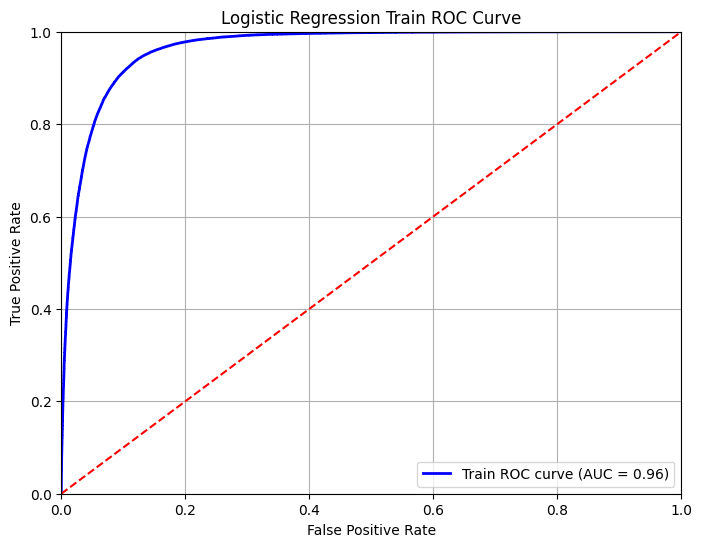

Logistic Regression Train AUC: 0.96


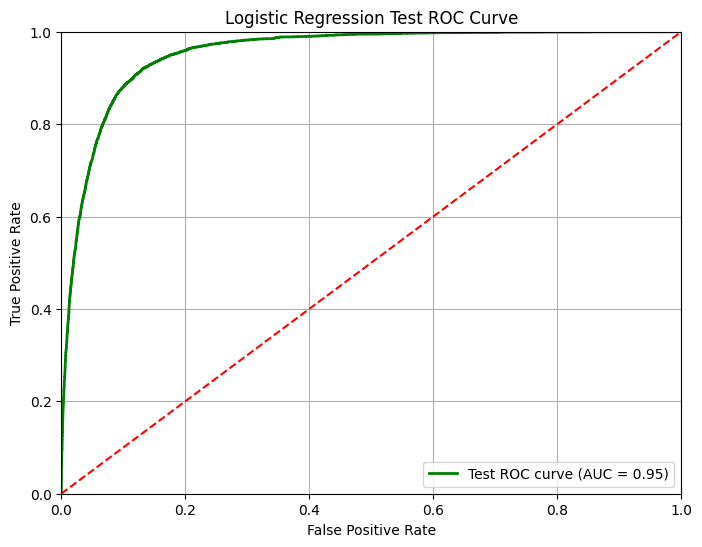

Logistic Regression Test AUC: 0.95


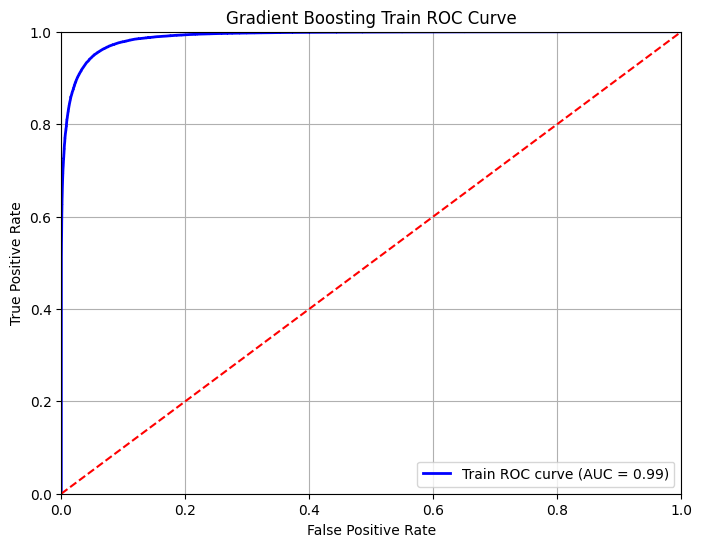

Gradient Boosting Train AUC: 0.99


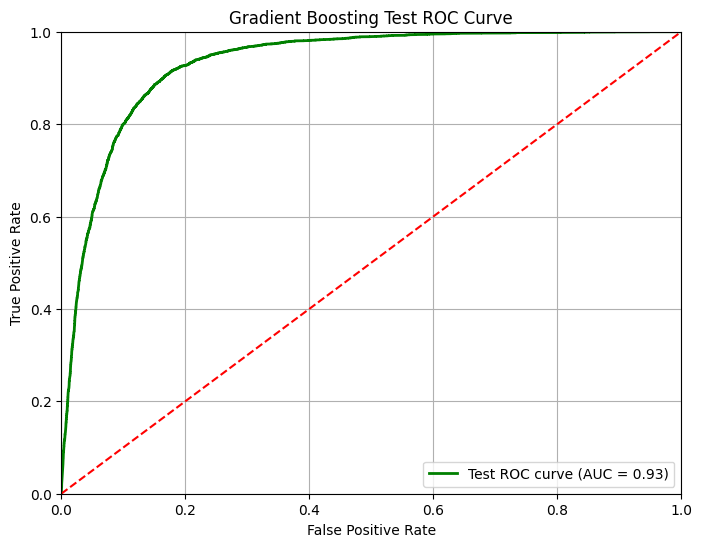

Gradient Boosting Test AUC: 0.93


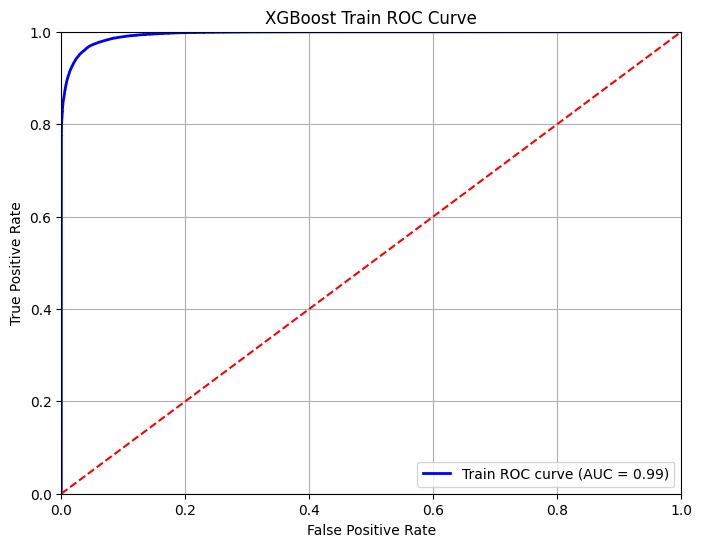

XGBoost Train AUC: 0.99


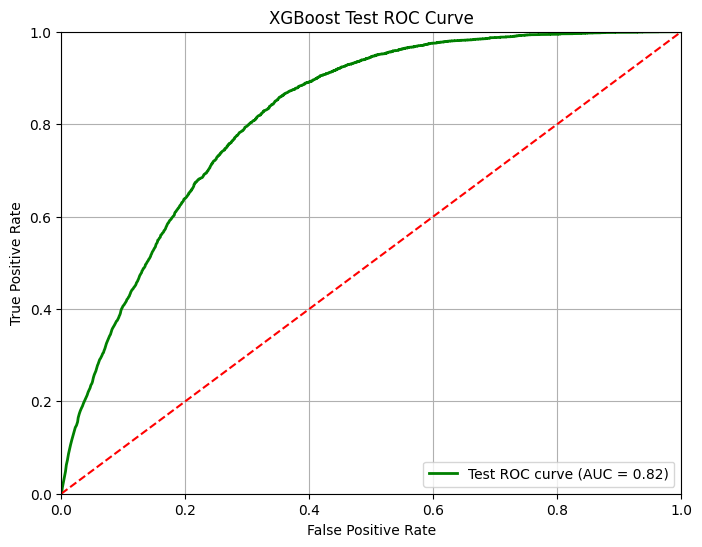

XGBoost Test AUC: 0.82
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 92038, number of negative: 92038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 184076, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


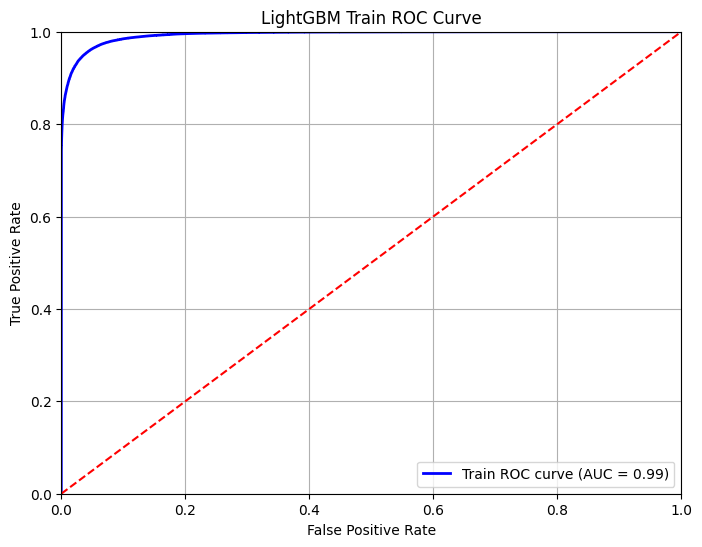

LightGBM Train AUC: 0.99


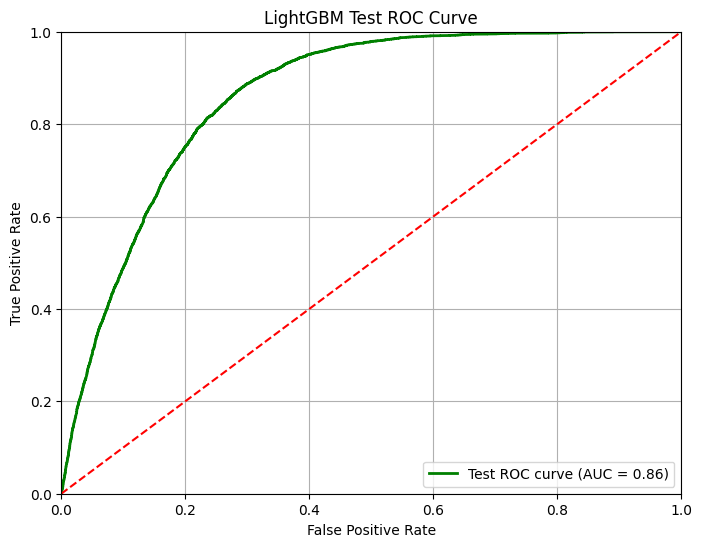

LightGBM Test AUC: 0.86
Learning rate set to 0.095519
0:	learn: 0.5679842	total: 79.7ms	remaining: 1m 19s
1:	learn: 0.4746405	total: 105ms	remaining: 52.5s
2:	learn: 0.4135134	total: 131ms	remaining: 43.5s
3:	learn: 0.3633546	total: 155ms	remaining: 38.6s
4:	learn: 0.3207000	total: 179ms	remaining: 35.7s
5:	learn: 0.2857774	total: 202ms	remaining: 33.5s
6:	learn: 0.2636756	total: 225ms	remaining: 31.9s
7:	learn: 0.2479864	total: 248ms	remaining: 30.7s
8:	learn: 0.2345756	total: 271ms	remaining: 29.9s
9:	learn: 0.2251278	total: 299ms	remaining: 29.6s
10:	learn: 0.2131562	total: 322ms	remaining: 29s
11:	learn: 0.2071023	total: 347ms	remaining: 28.6s
12:	learn: 0.1989076	total: 371ms	remaining: 28.1s
13:	learn: 0.1951391	total: 395ms	remaining: 27.8s
14:	learn: 0.1898628	total: 417ms	remaining: 27.4s
15:	learn: 0.1838343	total: 439ms	remaining: 27s
16:	learn: 0.1776046	total: 464ms	remaining: 26.8s
17:	learn: 0.1759261	total: 487ms	remaining: 26.5s
18:	learn: 0.1706470	total: 510ms	remain

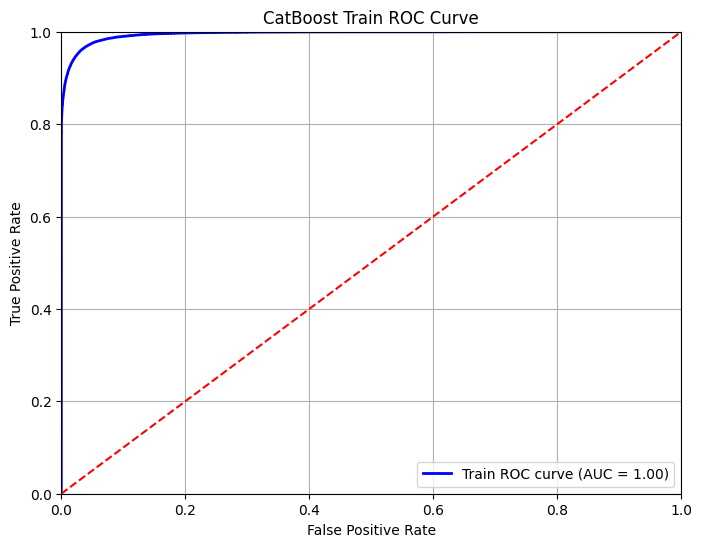

CatBoost Train AUC: 1.00


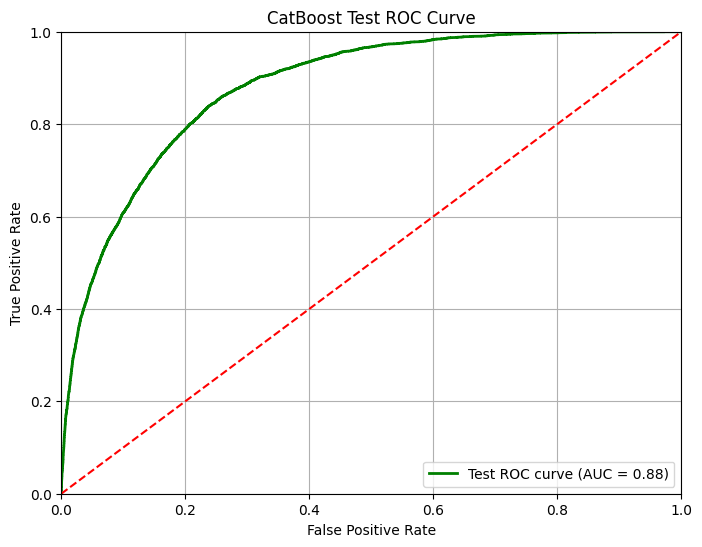

CatBoost Test AUC: 0.88


In [134]:
# Iterate through models, creating a pipeline for each
for name, model in models:
    # Create the pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('classifier', model)])

    # Fit the model
    pipeline.fit(x_train_scaled, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Make predictions using predict_proba on the training set
        y_train_pred_prob = pipeline.predict_proba(x_train_scaled)[:, 1]

        # Calculate ROC curve and AUC for the training set
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
        roc_auc_train = auc(fpr_train, tpr_train)

        # Plot the ROC curve for the training set
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Train ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        # Print AUC value for the training set
        print(f'{name} Train AUC: {roc_auc_train:.2f}')

        # Make predictions using predict_proba on the test set
        y_test_pred_prob = pipeline.predict_proba(x_test_scaled)[:, 1]

        # Calculate ROC curve and AUC for the test set
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
        roc_auc_test = auc(fpr_test, tpr_test)

        # Plot the ROC curve for the test set
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Test ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        # Print AUC value for the test set
        print(f'{name} Test AUC: {roc_auc_test:.2f}')

    else:
        print(f'{name} does not support predict_proba. Skipping ROC curve plotting.')

        # Predictions on the training set
        y_train_pred = pipeline.predict(x_train_scaled)
        print(f'{name} Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}')

        # Predictions on the test set
        y_test_pred = pipeline.predict(x_test_scaled)
        print(f'{name} Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

In [185]:
log = LogisticRegression()

log.fit(x_train_scaled, y_train)

LogisticRegression()

In [159]:
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [160]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [161]:
test.drop(columns = ['Name','City' ,'Academic Pressure','CGPA','Study Satisfaction','id'] , inplace = True)

In [162]:
df = test
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [163]:
test['Dietary Habits'].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [164]:
data = {
    'dietary_habits': [
        'Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc', 'Gender', '3',
        'More Healthy', 'Less than Healthy', 'Mihir', '1.0', 'Hormonal', 'Electrician', 
        None, 'No Healthy', 'Less Healthy', 'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 
        'Class 12', '2'
    ]
}
df = pd.DataFrame(data)



test['Dietary Habits'] = test['Dietary Habits'].replace({
    'More Healthy': 'Healthy',
    'Less Healthy': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy'
})

In [165]:
mode_value = test['Dietary Habits'].mode()[0]
test['Dietary Habits'] = test['Dietary Habits'].apply(
    lambda x: x if x in ['Healthy', 'Unhealthy', 'Moderate'] else mode_value
)

In [166]:
data = {
    'Degree': [
        'BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
        'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
        'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
        'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
        'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
        'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
        'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
        'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
        'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
        'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
        'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
        'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
        'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
        'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
        'Mahika', None, 'K.Ed', 'B.3.79', 'Mthanya', 'Working Professional',
        'Esha', 'LLS', 'LLEd', 'E.Tech', 'Doctor', 'N.Pharm', 'LCA',
        'B B.Com', 'RCA', 'Mihir', 'Advait'
    ]
}
df = pd.DataFrame(data)


valid_degrees = [
    'BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
    'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
    'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm',
    'MPA', 'BEd', 'B.Sc', 'M.Arch', 'MPharm', 'MTech'
]


mode_value = test['Degree'].mode()[0]  
test['Degree'] = test['Degree'].apply(lambda x: x if x in valid_degrees else mode_value)

In [167]:
data = {
    'Profession': [
        'Chef', 'Teacher', None, 'Business Analyst', 'Finanancial Analyst',
        'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
        'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
        'HR Manager', 'UX/UI Designer', 'Content Writer',
        'Educational Consultant', 'Civil Engineer', 'Manager',
        'Pharmacist', 'Financial Analyst', 'Architect',
        'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
        'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
        'Digital Marketer', 'Lawyer', 'Research Analyst',
        'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
        'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
        'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
        'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
        'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
        'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'
    ]
}
df = pd.DataFrame(data)


valid_professions = [
    'Chef', 'Teacher', 'Business Analyst', 'Financial Analyst', 'Chemist', 'Electrician',
    'Software Engineer', 'Data Scientist', 'Plumber', 'Marketing Manager', 'Accountant', 
    'Entrepreneur', 'HR Manager', 'UX/UI Designer', 'Content Writer', 'Educational Consultant',
    'Civil Engineer', 'Manager', 'Pharmacist', 'Architect', 'Mechanical Engineer', 
    'Customer Support', 'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer', 
    'Travel Consultant', 'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive', 
    'Doctor', 'Unemployed', 'Investment Banker', 'Family Consultant', 'City Manager', 
    'Medical Doctor', 'Working Professional', 'Analyst'
]


mode_value = test['Profession'].mode()[0]


test['Profession'] = test['Profession'].apply(lambda x: x if x in valid_professions else mode_value)

In [168]:

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].str.strip()

In [169]:
test.head()

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Working Professional,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Working Professional,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Working Professional,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Student,Teacher,NaN,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Working Professional,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [170]:
test.drop(columns = ['Working Professional or Student'] , inplace = True)

In [171]:
test.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Teacher,NaN,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [172]:
for col in ['Unemployed','Family Consultant','City Manager','Medical Doctor','Working Professional','Analyst']:
    test = test[test['Profession'] != col]

In [173]:
col = test['Sleep Duration'].unique()
col = col.ravel()
col2 = []
for i in col:
    if i not in ['Less than 5 hours','7-8 hours','More than 8 hours','5-6 hours']:
        col2.append(i)

for col in col2:
    test = test[test['Sleep Duration'] != col]

In [174]:
for col in ['MTech','MPharm','MPA','BEd','B.Sc','M.Arch']:
    test = test[test['Degree'] != col]

In [175]:
def detect_outliers_in_columns(df):

    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any value in the column is below the lower bound or above the upper bound
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns



def count_of_outliers(df, outlier_columns): # Finding the count of outlier
    outlier_counts = {}
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts


outlier_columns = detect_outliers_in_columns(test)
print("Columns with outliers:", outlier_columns)

outlier_counts = count_of_outliers(test, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: []
Outlier counts per column: {}


In [176]:
test.isnull().sum()/len(test)*100

Gender                                    0.000000
Age                                       0.000000
Profession                                0.000000
Work Pressure                            20.021766
Job Satisfaction                         20.017498
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
dtype: float64

In [177]:
test['Work Pressure'] = test['Work Pressure'].fillna(test['Work Pressure'].median())


test['Job Satisfaction'] = test['Job Satisfaction'].fillna(test['Job Satisfaction'].median())
test.isnull().sum()/test.shape[0]*100

Gender                                   0.0
Age                                      0.0
Profession                               0.0
Work Pressure                            0.0
Job Satisfaction                         0.0
Sleep Duration                           0.0
Dietary Habits                           0.0
Degree                                   0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
dtype: float64

In [178]:
df = test

In [179]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])

df['Profession' ]  = lab.fit_transform(df['Profession'])
df['Have you ever had suicidal thoughts ?' ]  = lab.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness' ]  = lab.fit_transform(df['Family History of Mental Illness'])
df['Degree' ]  = lab.fit_transform(df['Degree'])


In [180]:
test.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,19,2.0,5.0,Less than 5 hours,Moderate,12,0,9.0,3.0,1
1,0,58.0,12,2.0,4.0,Less than 5 hours,Moderate,2,0,6.0,4.0,0
2,1,53.0,31,4.0,1.0,7-8 hours,Moderate,0,1,12.0,4.0,0
3,0,23.0,31,3.0,3.0,More than 8 hours,Moderate,10,1,10.0,4.0,0
4,1,47.0,31,5.0,5.0,7-8 hours,Moderate,7,1,3.0,4.0,0


In [181]:
# df.drop(columns = ['Dietary Habits'] , inplace = True)

# df.drop(columns = ['Sleep Duration'] , inplace = True)

df['Dietary Habits' ]  = lab.fit_transform(df['Dietary Habits'])
df['Sleep Duration' ]  = lab.fit_transform(df['Sleep Duration'])

In [182]:
df.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,19,2.0,5.0,2,1,12,0,9.0,3.0,1
1,0,58.0,12,2.0,4.0,2,1,2,0,6.0,4.0,0
2,1,53.0,31,4.0,1.0,1,1,0,1,12.0,4.0,0
3,0,23.0,31,3.0,3.0,3,1,10,1,10.0,4.0,0
4,1,47.0,31,5.0,5.0,1,1,7,1,3.0,4.0,0


In [183]:
scaler = StandardScaler()
test = scaler.fit_transform(df)

# Convert the result back to a DataFrame
test_scaled = pd.DataFrame(test, columns=df.columns)


In [186]:
y_pred = log.predict(test_scaled)

In [187]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [188]:
for i in range(len(y_pred)):
    sub.loc[i, 'Depression'] = y_pred[i]
sub.head(4)
sub.to_csv('SV_MK_2_submission_logistic_regression.csv',index=False)